In [1]:
!pip install geopandaS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/Datasets/EVStats.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Datasets/states_data_car.csv")

In [4]:
df1.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


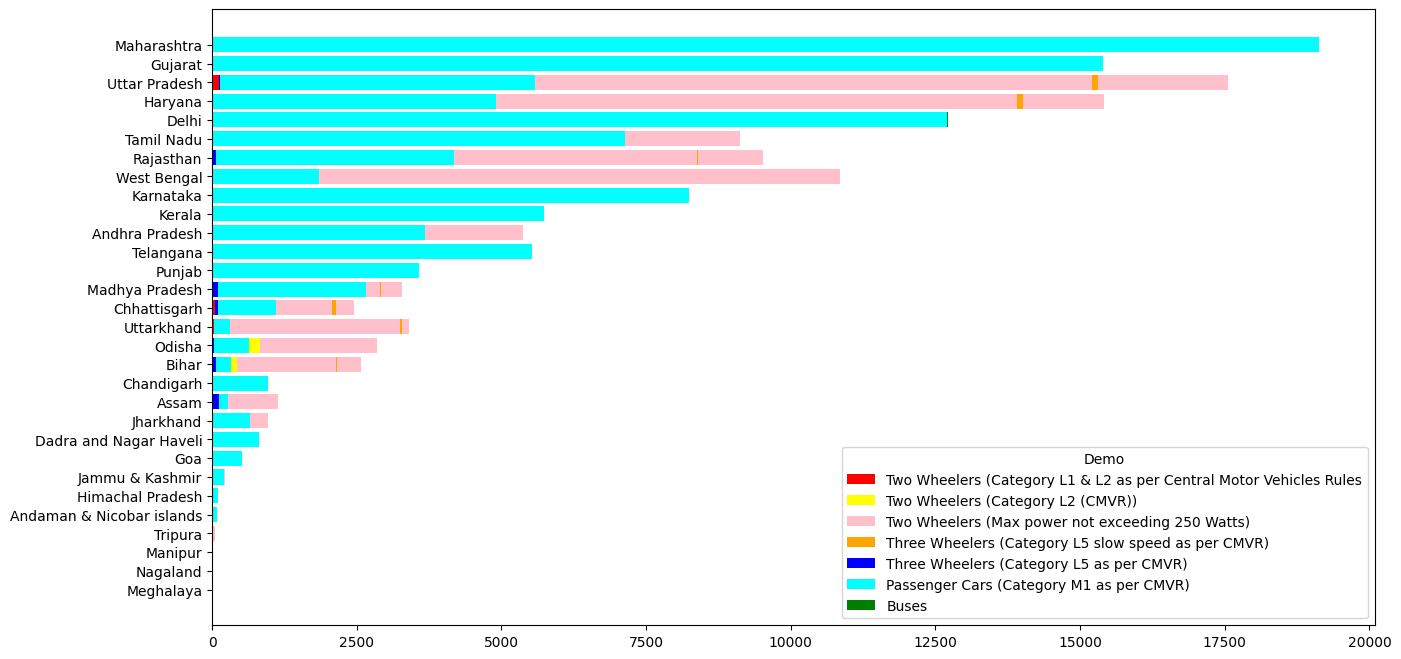

In [5]:
state = list(df1['State'])
x1 = list(df1['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'])
x2 = list(df1['Two Wheelers (Category L2 (CMVR))'])
x3 = list(df1['Two Wheelers (Max power not exceeding 250 Watts)'])
x4 = list(df1['Three Wheelers (Category L5 slow speed as per CMVR)'])
x5 = list(df1['Three Wheelers (Category L5 as per CMVR)'])
x6 = list(df1['Passenger Cars (Category M1 as per CMVR)'])
x7 = list(df1['Buses'])

plt.figure(figsize = (15,8))
b1 = plt.barh(state, x1, color="red")
b2 = plt.barh(state, x2, left = x1, color = "yellow")
b3 = plt.barh(state, x3, left = x2, color = "pink")
b4 = plt.barh(state, x4, left = x3, color = "orange")
b5 = plt.barh(state, x5, left = x4, color = "blue")
b6 = plt.barh(state, x6, left = x5, color = "cyan")
b7 = plt.barh(state, x7, left = x6, color = "green")

plt.legend([b1, b2, b3, b4, b5, b6, b7], ["Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules", "Two Wheelers (Category L2 (CMVR))", "Two Wheelers (Max power not exceeding 250 Watts)", "Three Wheelers (Category L5 slow speed as per CMVR)", "Three Wheelers (Category L5 as per CMVR)", "Passenger Cars (Category M1 as per CMVR)", "Buses"], title="Demo", loc="lower right")

plt.show()

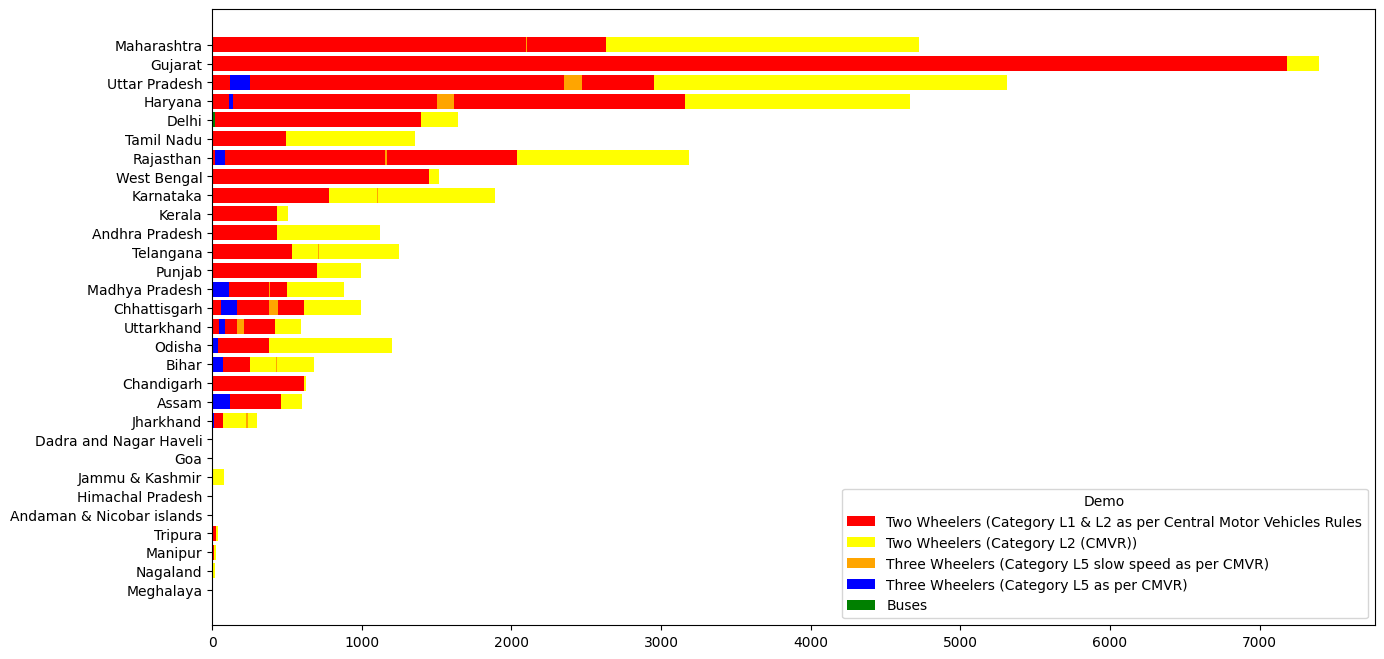

In [6]:
state = list(df1['State'])
x1 = list(df1['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'])
x2 = list(df1['Two Wheelers (Category L2 (CMVR))'])
x4 = list(df1['Three Wheelers (Category L5 slow speed as per CMVR)'])
x5 = list(df1['Three Wheelers (Category L5 as per CMVR)'])
x7 = list(df1['Buses'])

plt.figure(figsize = (15,8))
b1 = plt.barh(state, x1, color="red")
b2 = plt.barh(state, x2, left = x1, color = "yellow")
b4 = plt.barh(state, x4, left = x2, color = "orange")
b5 = plt.barh(state, x5, left = x4, color = "blue")
b7 = plt.barh(state, x7, left = x5, color = "green")

plt.legend([b1, b2, b4, b5, b7], ["Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules", "Two Wheelers (Category L2 (CMVR))", "Three Wheelers (Category L5 slow speed as per CMVR)", "Three Wheelers (Category L5 as per CMVR)", "Buses"], title="Demo", loc="lower right")

plt.show()

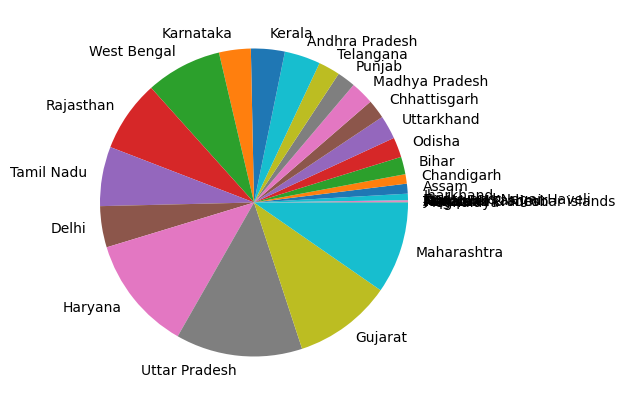

In [7]:
# Number of Two Wheelers
state = list(df1['State'])
 
No_of_2_wheelers = list(df1['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules'] + df1['Two Wheelers (Category L2 (CMVR))'] + df1['Two Wheelers (Max power not exceeding 250 Watts)'])

fig = plt.figure(figsize =(5, 5))
plt.pie(No_of_2_wheelers, labels = state)

plt.show()

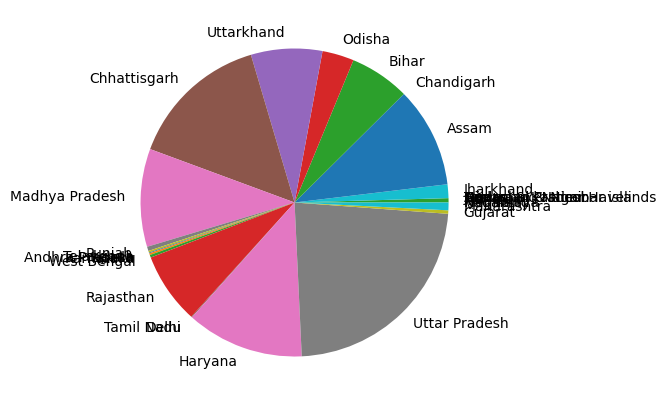

In [8]:
# Number of 3 Wheelers

state = list(df1['State'])
 
No_of_3_wheelers = list(df1['Three Wheelers (Category L5 slow speed as per CMVR)'] + df1['Three Wheelers (Category L5 as per CMVR)'])

fig = plt.figure(figsize =(5, 5))
plt.pie(No_of_3_wheelers, labels = state)

plt.show()

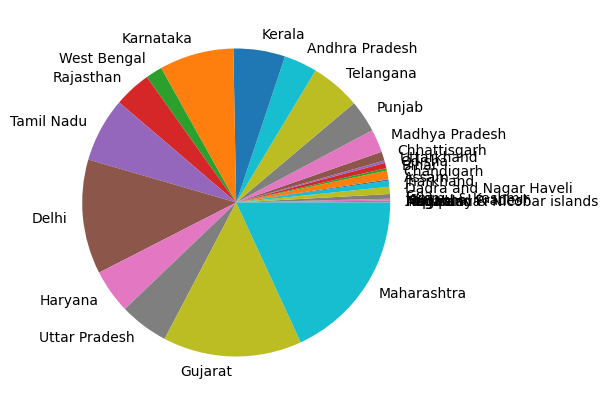

In [9]:
# No. of passenger cars

state = list(df1['State'])
 
No_of_passenger_cars = list(df1['Passenger Cars (Category M1 as per CMVR)'])

fig = plt.figure(figsize =(5, 5))
plt.pie(No_of_passenger_cars, labels = state)

plt.show()

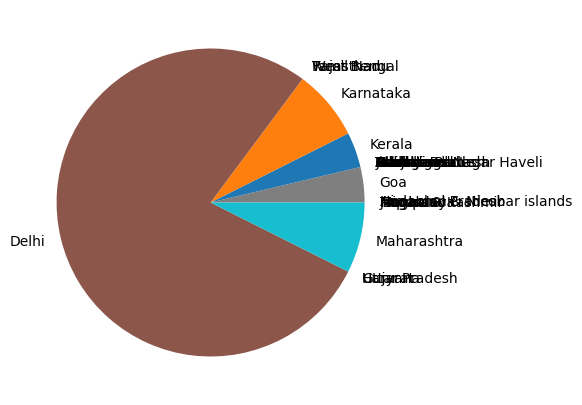

In [10]:
# Number of buses

state = list(df1['State'])
 
No_of_buses = list(df1['Buses'])

fig = plt.figure(figsize =(5, 5))
plt.pie(No_of_buses, labels = state)

plt.show()

<Axes: title={'center': 'Total number of EV'}>

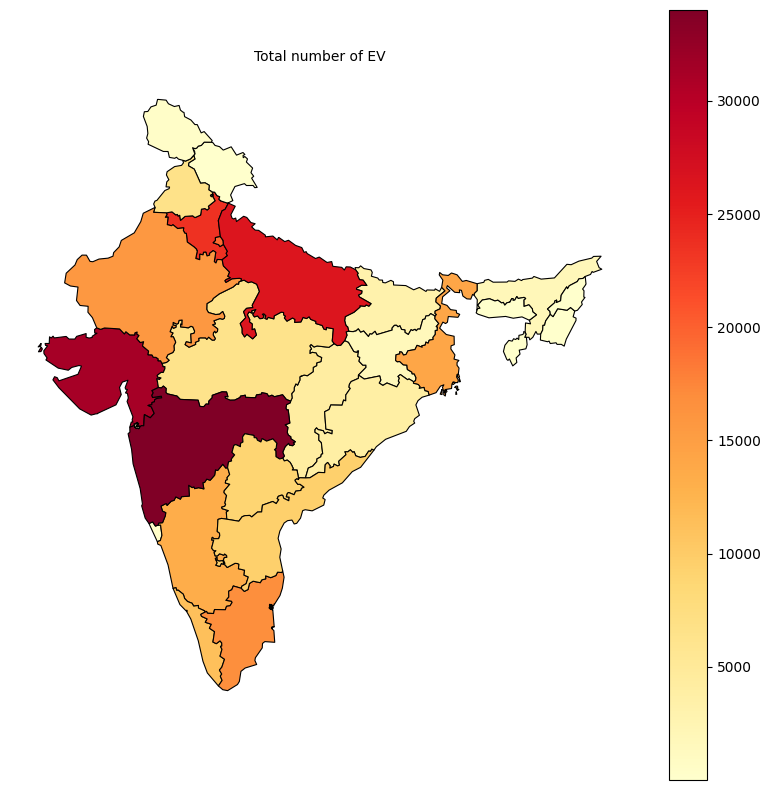

In [11]:
df1.at[6, 'State'] = "Jammu and Kashmir"

india_shapefile = r"/content/drive/MyDrive/Datasets/data (1)/india-polygon.shp"
map_df = gpd.read_file(india_shapefile)

merged = map_df.set_index('st_nm').join(df1.set_index('State'))
merged.head()

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Total number of EV', fontdict={'fontsize': '10', 'fontweight' : '10'})

merged.plot(column='Total in state',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])

In [12]:
df2.head()

,state,capital,subsidy,road tax,petrol,diesel
0,Andhra Pradesh,Amaravati,0.0,1.0,111.65,99.41
1,Arunachal Pradesh,Itanagar,5000.0,0.0,95.89,84.81
2,Assam,Dispur,10000.0,1.0,96.34,84.24
3,Bihar,Patna,10000.0,1.0,109.17,95.82
4,Chhattisgarh,Raipur,5000.0,0.0,102.98,95.96


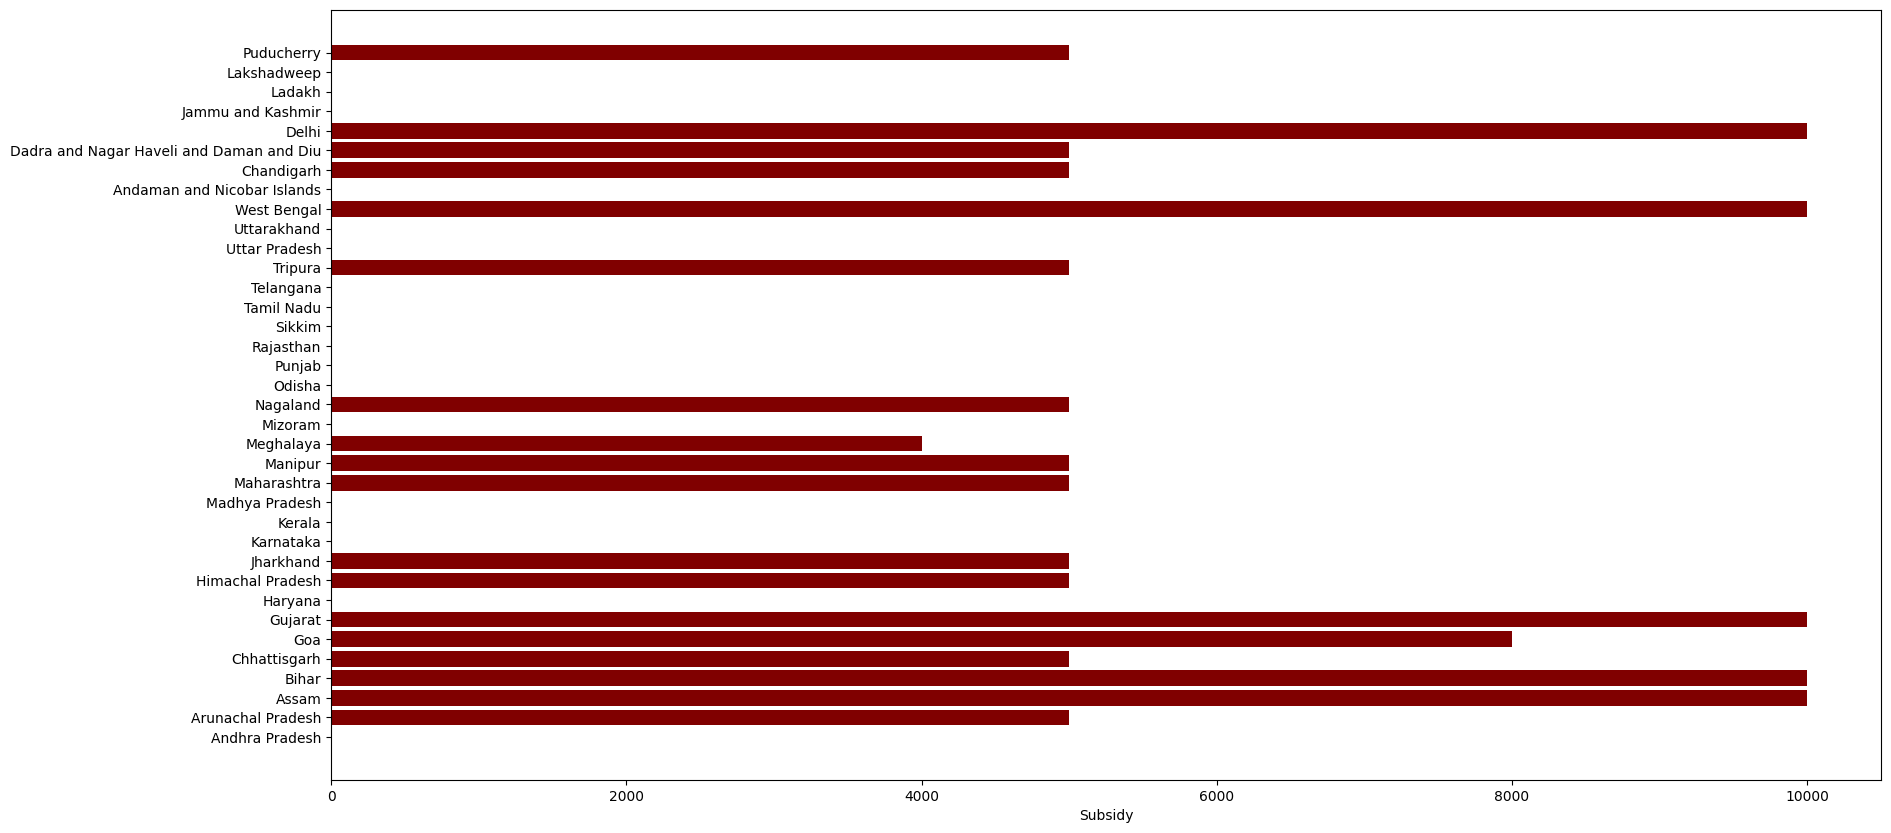

In [14]:
x = list(df2["state"])
y = list(df2['subsidy'])
  
fig = plt.figure(figsize = (20, 10))

plt.barh(x, y, color ='maroon')

plt.xlabel("Subsidy")
plt.show()

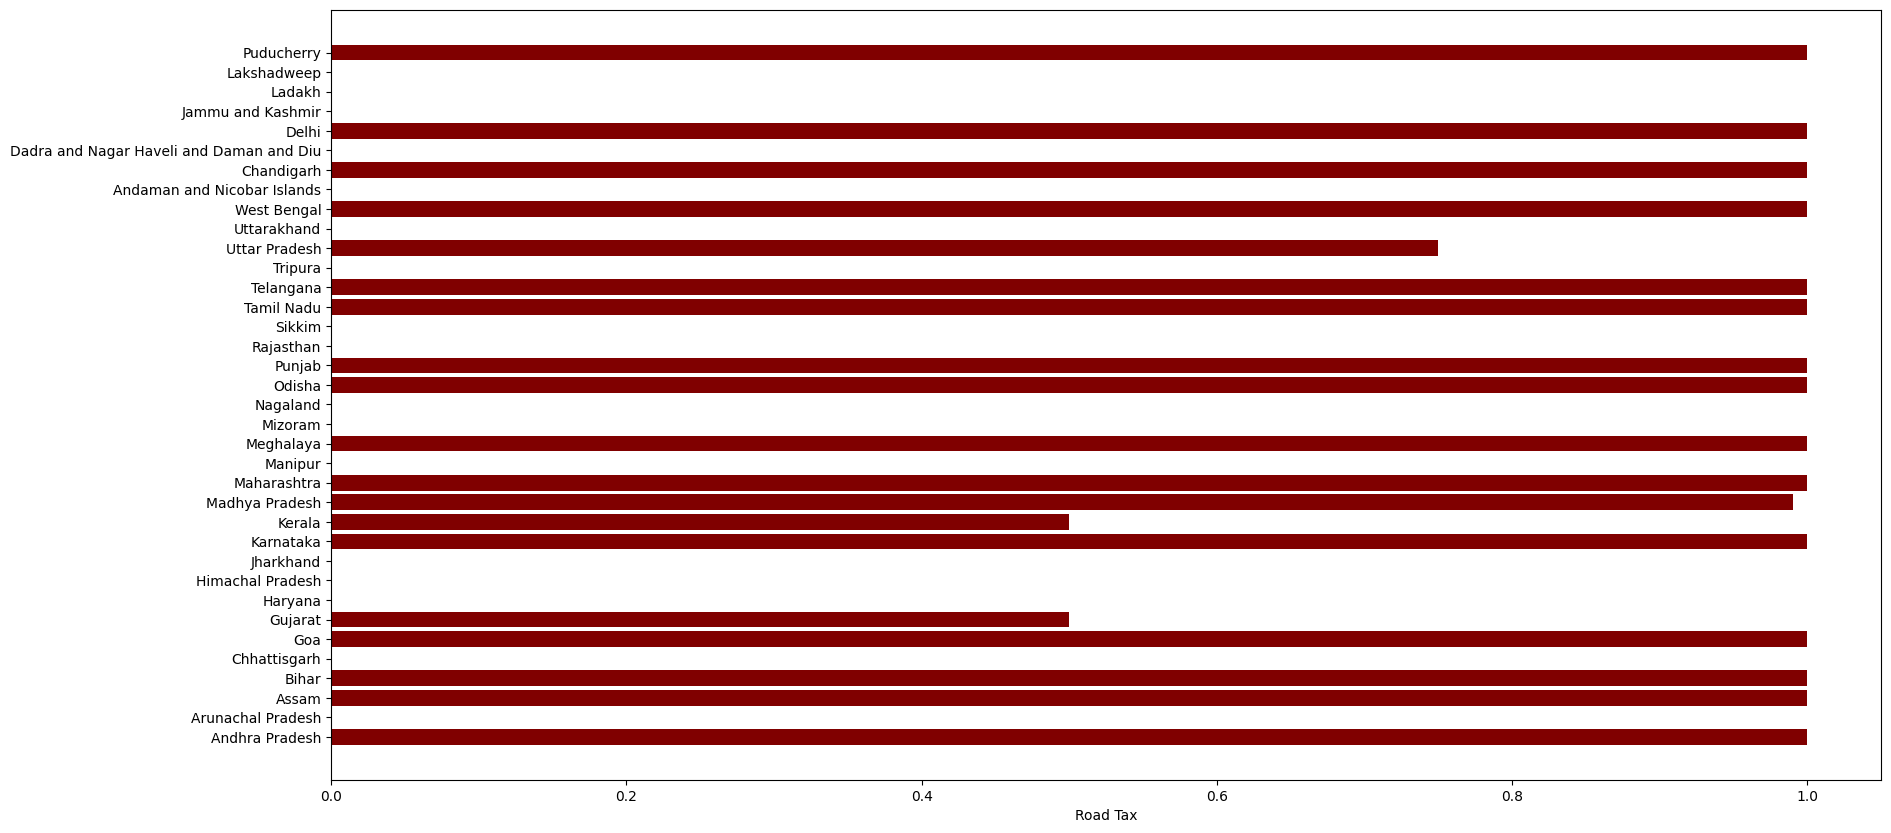

In [15]:
x = list(df2["state"])
y = list(df2['road tax'])
  
fig = plt.figure(figsize = (20, 10))

plt.barh(x, y, color ='maroon')

plt.xlabel("Road Tax")
plt.show()

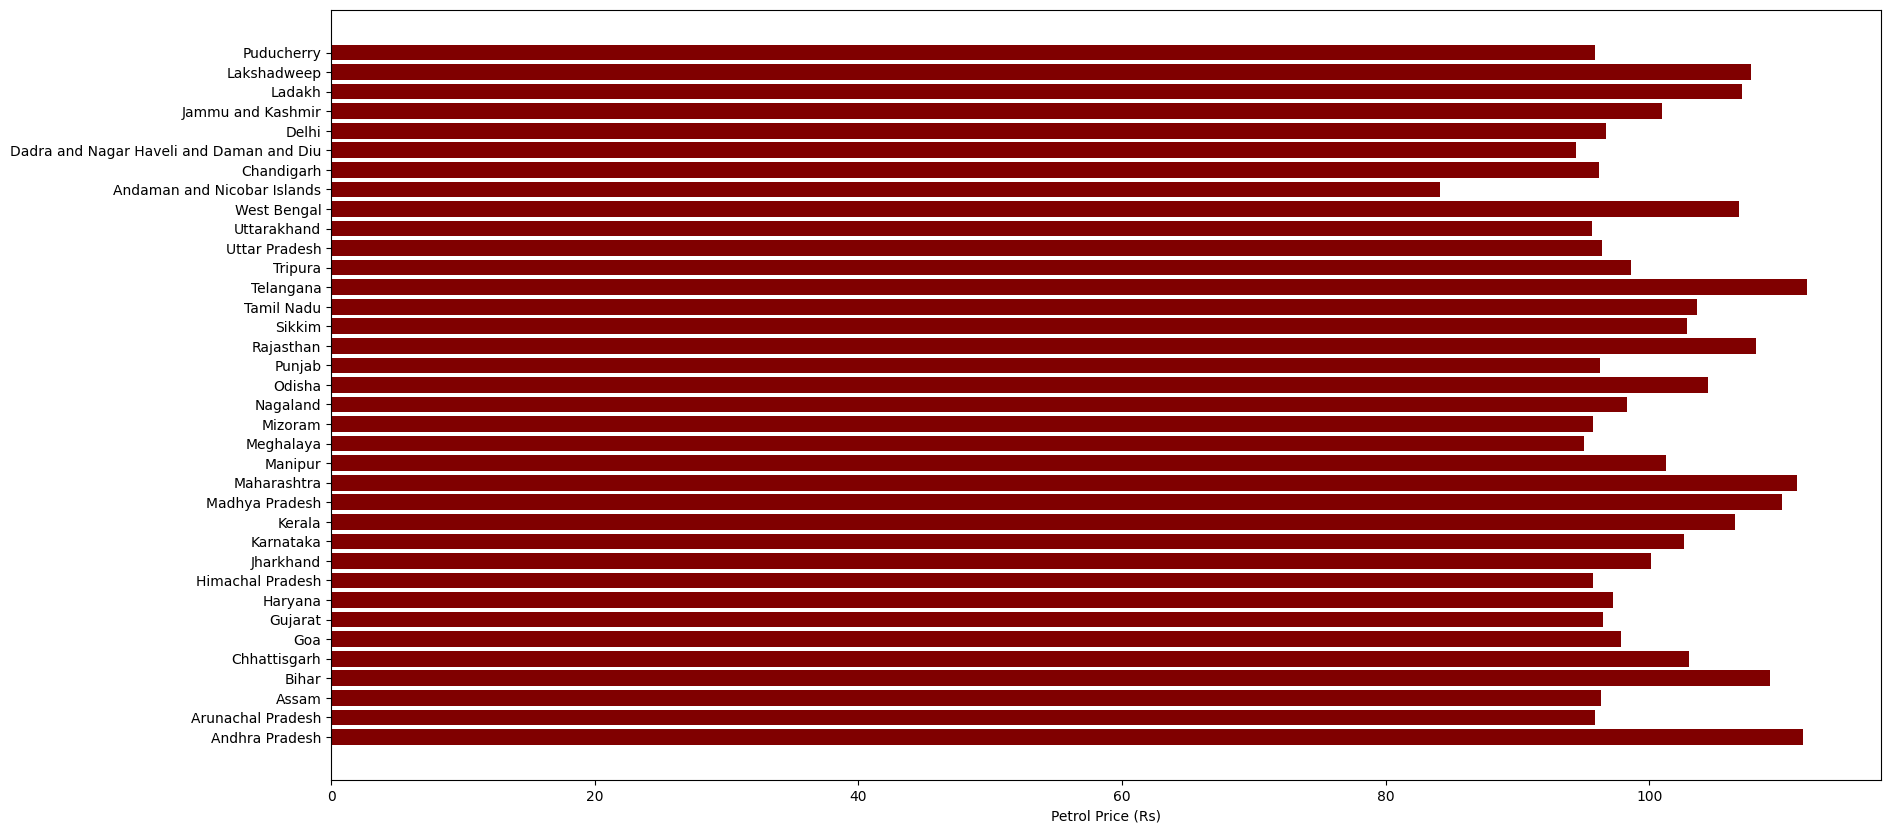

In [16]:
x = list(df2["state"])
y = list(df2['petrol'])
  
fig = plt.figure(figsize = (20, 10))

plt.barh(x, y, color ='maroon')

plt.xlabel("Petrol Price (Rs)")
plt.show()

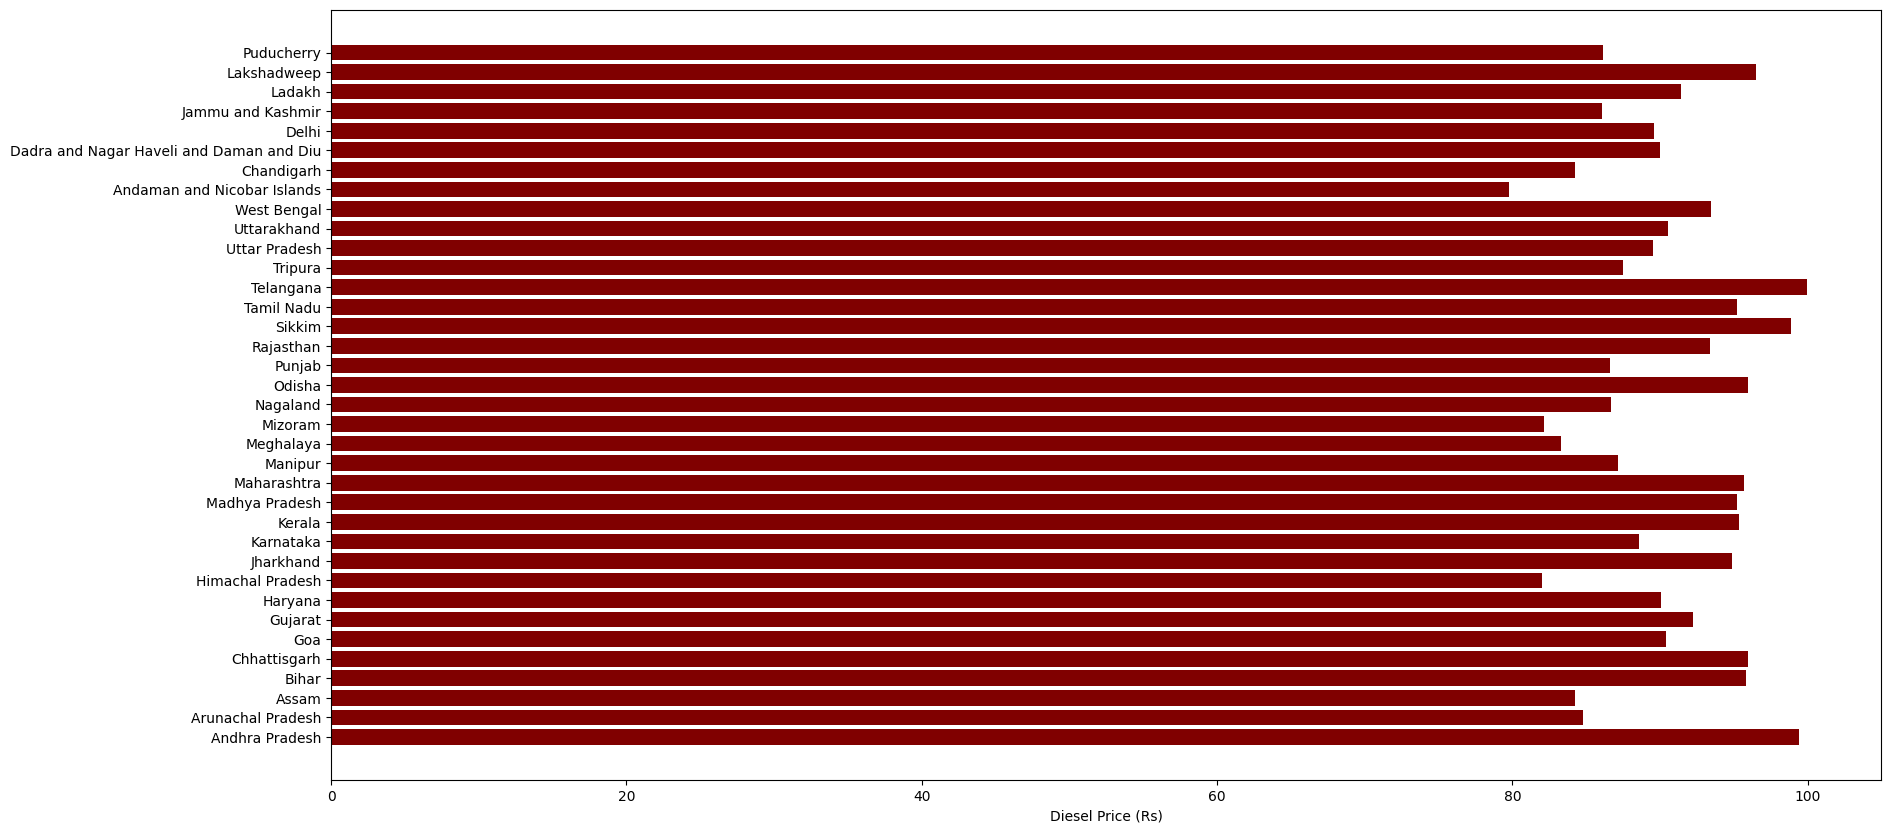

In [17]:
x = list(df2["state"])
y = list(df2['diesel'])
  
fig = plt.figure(figsize = (20, 10))

plt.barh(x, y, color ='maroon')

plt.xlabel("Diesel Price (Rs)")
plt.show()

<Axes: >

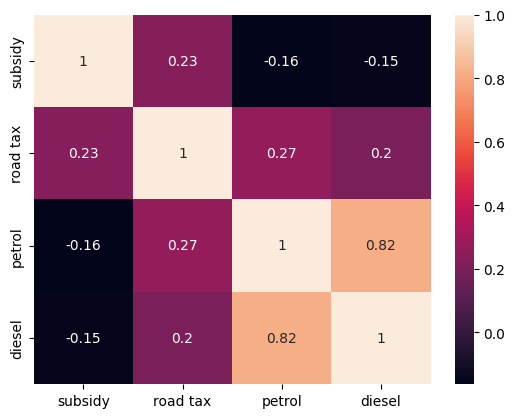

In [18]:
sns.heatmap(df2[["subsidy", "road tax", "petrol", "diesel"]].corr(), annot=True)